# Understanding Bikes Trips in California's Bay Area

By: Mohamed M. Saad

## Preliminary Wrangling

This document explores a dataset containing Bay Wheel trips and attributes for approximately 500,000 bikes trips.
You can download the data from the following link
https://s3.amazonaws.com/baywheels-data/2017-fordgobike-tripdata.csv.zip

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('data/2017-fordgobike-tripdata.csv')

We will start by checking the size and shape of the data using `shape` and `head`, along with this fields types. Then see some descriptive statistics for numeric variables using `describe`.

Next will use `info` for missing data to see if we need to do data cleaning. The statistics and the information shows that the data is cleaned enough, and we just need to do some type conversion from string columns (e.g., `start_time` and `end_time`) to timestamp.

In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(519700, 13)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object
   duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   
5          9226  2017-12-31 22:51:00.9180  2018-01-01 01:24:47.1660   
6          4507  2017

In [4]:
# descriptive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [5]:
# check for qaulity and null-values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [6]:
# Unique values for each field
df.nunique()

duration_sec                13490
start_time                 519688
end_time                   519681
start_station_id              272
start_station_name            272
start_station_latitude        272
start_station_longitude       272
end_station_id                272
end_station_name              272
end_station_latitude          272
end_station_longitude         272
bike_id                      3673
user_type                       2
dtype: int64

### Dataset Structure
The data used for this investigation is the collected information for the year 2017. It consists of 519,700 trips information. Each trip is anonymized and includes:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

The data structured as



### Features

I'm most interested in figuring out what features are best for distribution of bikes over the stations, and to predict the usage of bikes during the trip.
Furthermore, we can investigate the relationships with trip on both the spacial domain and the time domain. We can categorize the trips based on its length (implied by the duration) or based on the user tpes. 


The main features of interests are 
- **Timestamp attributes**: start_time, end_time, duration_sec ===> **It will be useful for Time domain analysis**
- **Geo location attributes**: start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude ===> **It will be useful for Space domain analysis**
- **Trip Attribute**: start_station_id, start_station_name, end_station_id, end_station_name ===> **Will be useful to define the from/to for each trip**
- **Categorical**: user_type ==> **Will be usefull for qualitative analysis**
- **Identifiers**: bike_id, start_station_id/end_station_id ==> **Useful for grouping and aggregations**

As a general assumptions here, I will consider trips with less than 1 hour length as `Short Trip`, and longer than 1 hour as `Long Trip`.

In [7]:
# convert string fields to timestamp
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
# we are interested in duration in minutes rather than seconds
short_trip_max_min = 60
df['duration_min'] = df['duration_sec']/short_trip_max_min
df['short_trip'] = df['duration_min'] <= short_trip_max_min
# Month of the year
df['month_of_year'] = pd.DatetimeIndex(df['start_time']).month
df['week_of_year'] = pd.DatetimeIndex(df['start_time']).week
# Day of the week
df['day_of_week'] = pd.DatetimeIndex(df['start_time']).dayofweek
# Hour of the day
df['start_hour'] = pd.DatetimeIndex(df['start_time']).hour
df['end_hour'] = pd.DatetimeIndex(df['end_time']).hour

In [8]:
# make sure of no invalid zero time data
df[df['duration_min'] < 0].shape[0] 

0

## Univariate Exploration

Let's start our exploration by looking at the main variables of interest. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

### Distribution of Trip Duration
We will start by checking the trip duration in minutes.
When checking the distribution of duration on all the dataset we will find it is unimodal with right skewed long tail. Values ranges from few minutes to around one day.

We see that 97% of data is for trips that are less than 60 minutes. To see more accurate distribution, we will see the histogram for only these trips. It is also a right skewed with peak at trips between 6 to 8 minutes (with 75,000 total trips).

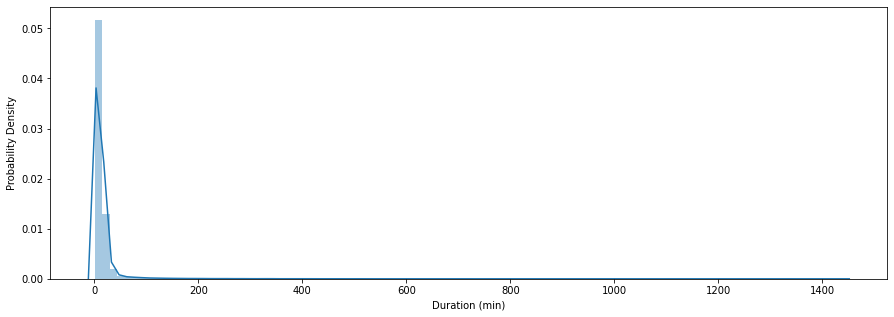

In [9]:
plt.figure(figsize = [15, 5])
sb.distplot(df['duration_min'], norm_hist=True, bins=100)
plt.xlabel("Duration (min)")
plt.ylabel("Probability Density")
plt.show()

In [10]:
normal_trips_count = df[df['short_trip']].shape[0]/df.shape[0] * 100
print("Short trips percentage {:2.2f}%".format(normal_trips_count))

Short trips percentage 96.89%


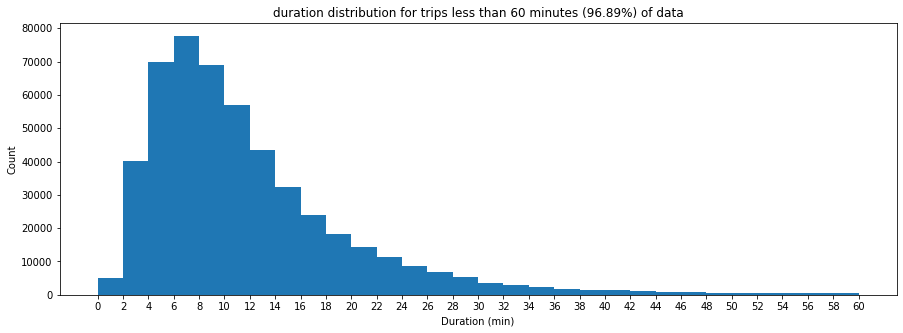

In [11]:
plt.figure(figsize = [15, 5])
step = 2
duration_bins = np.arange(0, short_trip_max_min + step, step)
plt.hist(data = df[df['short_trip']], x = 'duration_min', bins = duration_bins);
plt.xticks(duration_bins);
plt.xlabel("Duration (min)")
plt.ylabel("Count")
plt.title("duration distribution for trips less than {:2} minutes ({:2.2f}%) of data".format(short_trip_max_min, normal_trips_count));
plt.show()

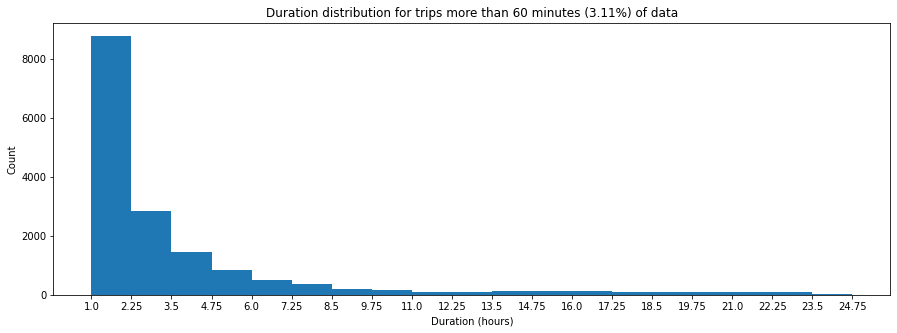

In [12]:
plt.figure(figsize = [15, 5])
step = 75 # 1.25 hour as a step
duration_bins = np.arange(short_trip_max_min, df['duration_min'].max() + step, step)
duration_ticks = np.arange(short_trip_max_min/60, (df['duration_min'].max() + step)/60, step/60)

plt.hist(data = df[(df['short_trip'] == False)], x = 'duration_min', bins = duration_bins);
plt.xticks(duration_bins, duration_ticks);
plt.xlabel("Duration (hours)")
plt.ylabel("Count")
plt.title("Duration distribution for trips more than {:2} minutes ({:2.2f}%) of data".format(short_trip_max_min, (100 - normal_trips_count)));
plt.show()

### Distribution of Trip Source/Destination Distance

In the dataset we have the start and end stations used for the trip. We can calcualte the euclidien distance between them and set this as a lower bound estimate to the trip distance as it is the shortest path between points.

The following code will calcualte euclidien distance, It is available online and cited at the references section at the end of the report.

We will need to drop two types of points 
- Start and end stations are the same as this will give us wrong zero distance as the user returned the bick to the same station he took (total 18134 points)
- Outliers that trip distance more than 10km (only 67 points)

Plotting the distribution shows a right skewed bi-modal distribution

In [13]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

df['distance'] =  df.apply(lambda row: haversine(
            row['start_station_longitude'], row['start_station_latitude'], 
            row['end_station_longitude'], row['end_station_latitude']), axis=1) 

In [14]:
print("Outliers = ", df[(df['distance'] > 10)].shape[0])

Outliers =  67


In [15]:
print("Same Station = ", df[df['start_station_id']==df['end_station_id']].shape[0])

Same Station =  18134


In [16]:
# remove points where start & end points are the same
df_distance = df[df['start_station_id']!=df['end_station_id']] 
# remove outliers
df_distance = df_distance[df_distance['distance'] <= 10] 

In [17]:
df_distance['distance'].describe()

count    501499.000000
mean          1.642541
std           0.956563
min           0.013287
25%           0.950822
50%           1.425798
75%           2.088456
max           9.940377
Name: distance, dtype: float64

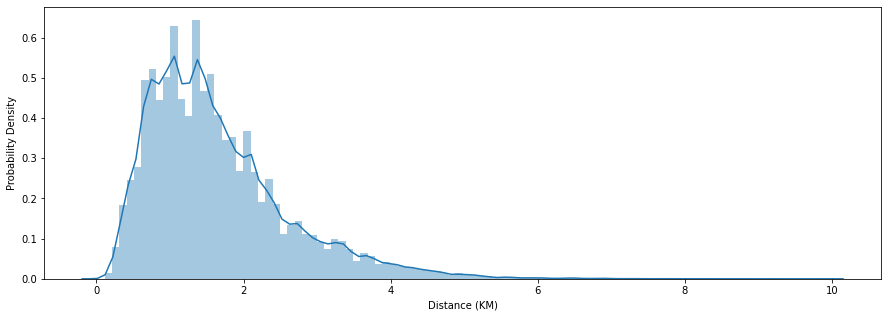

In [18]:
plt.figure(figsize = [15, 5])
sb.distplot(df_distance['distance'], norm_hist=True, bins=100)
plt.xlabel("Distance (KM)")
plt.ylabel("Probability Density")
plt.show()

### Distribution of User Types
As we have just two types of user (Subscriber or Customer). I'm interested to see the porpotion of users of each type as a pie chart. The majority of users are subscribers to the service, while 21% are ad-hoc customers.


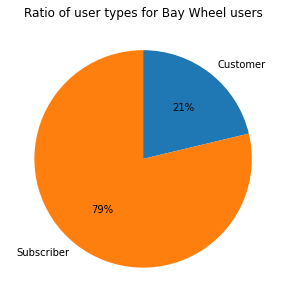

In [19]:
plt.figure(figsize = [5, 5])
df_user_types = df.groupby('user_type').size()
plt.pie(df_user_types, labels = df_user_types.index, startangle = 90, counterclock = False, 
        autopct=lambda val:"{:2.0f}%".format(val));
plt.title("Ratio of user types for Bay Wheel users");
plt.show()

### Distribution of Trip Time
Another important aspect is the start and end time for trips because it shows what is the peak times for taking or returning the bikes. 

So we will check the distributions of the start and end times grouped by the following granularities:
- Hour of the day
- Day of the week
- Month of the year 


#### Hour of the day
The distribution for Hour of the Day is bimodal with two peaks at 8 AM & 5 PM for both the start and end of the trip. This is the standard start and end for business days, so seems that most of users are using bikes to go to (or return from) work.

The most rare time for starting a trip is at 3 AM, which make sense

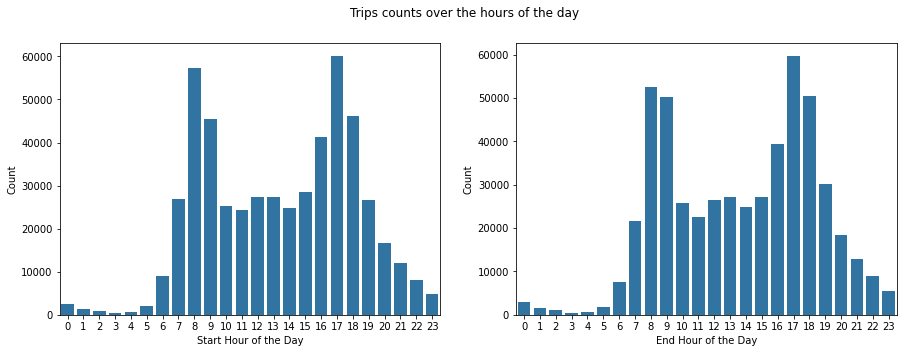

In [20]:
plt.figure(figsize = [15, 5])
plt.suptitle('Trips counts over the hours of the day')
plt.subplot(1, 2, 1) 
sb.countplot(data = df, x = 'start_hour', color = sb.color_palette()[0]);
plt.xlabel("Start Hour of the Day")
plt.ylabel("Count")
plt.subplot(1, 2, 2) 
sb.countplot(data = df, x = 'end_hour', color = sb.color_palette()[0]);
plt.xlabel("End Hour of the Day");
plt.ylabel("Count")
plt.show()

#### Day of the Week
The distribution of trips over the day of the week reveals that Weekends shows the lowest trips count, but the longest trips. This indicates that most of the users uses bikes as a means for transportation not for fun.

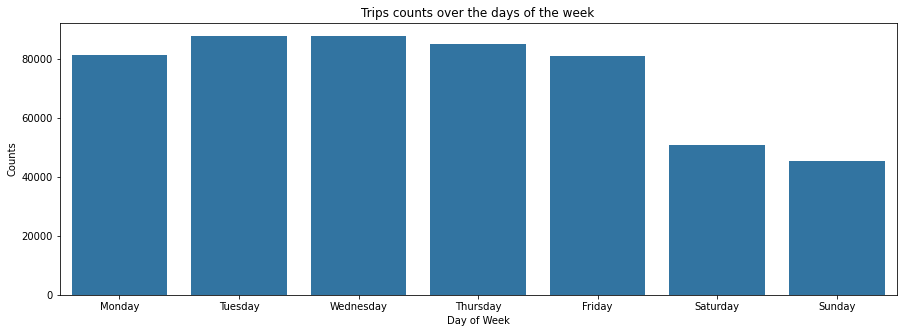

In [21]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize = [15, 5])
sb.countplot(data = df, x = 'day_of_week', color = sb.color_palette()[0]);
plt.xticks(np.arange(0,7,1), days);
plt.title('Trips counts over the days of the week');
plt.xlabel("Day of Week")
plt.ylabel("Counts")
plt.show()

#### Months
Unfortunately the data collected doesn't cover the whole year, so the analysis here shows the second half of the year. (P.S. June is excluded because of incomplete data).

A breakdown with the trips counts per month is plotted at the left, and a finer plot on the level of weeks to the right.
The highest number of trips recorded was at October while is more than double the trips at July (the lowest month).

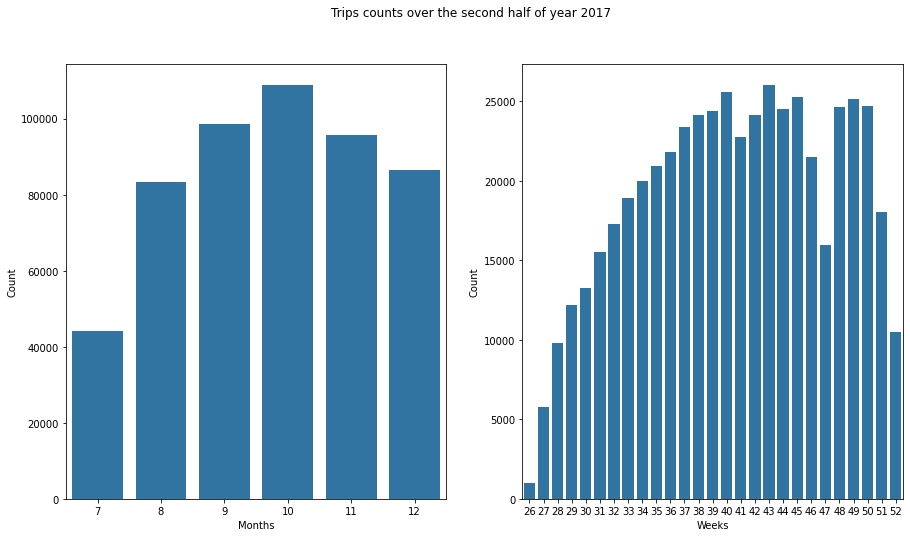

In [22]:
# Data for July seems too few, so skip it from the figure
plt.figure(figsize = [15, 8])
plt.suptitle('Trips counts over the second half of year 2017');

plt.subplot(1, 2, 1) 
sb.countplot(data = df[df['month_of_year']>6], x = 'month_of_year', color = sb.color_palette()[0]);
plt.xlabel("Months")
plt.ylabel("Count")

plt.subplot(1, 2, 2) 
sb.countplot(data = df[df['month_of_year']>6], x = 'week_of_year', color = sb.color_palette()[0]);
plt.xlabel("Weeks")
plt.ylabel("Count")
plt.show()

## Bivariate Exploration

Now, let us investigate relationships between pairs of variables 

To start off with, I want to look at the pairwise correlations present between features in the data. We will see few interesting correlations some of them are false, and I will point out why
- Distance vs Duration --> weak correlation
- Start/End hours --> strong correlation implied by the short distances nature of the trips
- Start/End longitude/latitude --> strong correlation implied by the short distance

Other correlations are false because some fields are drived from others, and some doesn't capture a practical meaning like correlation between long/lat for the same stations.

In the next sections we will try to find more relations between categorial attributes and quantative attributes

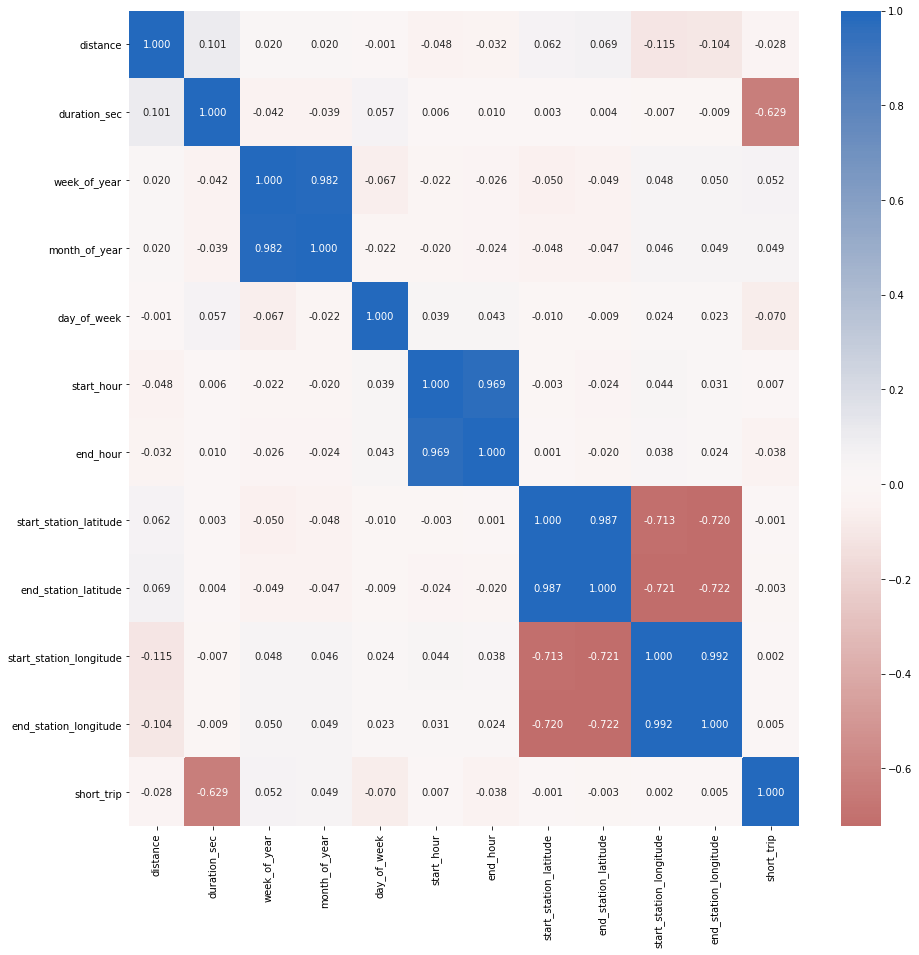

In [23]:
numeric_vars = ['distance', 
                'duration_sec', 
                'week_of_year', 'month_of_year', 
                'day_of_week', 
                'start_hour', 'end_hour', 
                'start_station_latitude', 'end_station_latitude',
                'start_station_longitude', 'end_station_longitude',
                'short_trip'
               ]
categoric_vars = ['distance', 'duration_sec', 'clarity']

# correlation plot
plt.figure(figsize = [15, 15])
sb.heatmap(df_distance[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

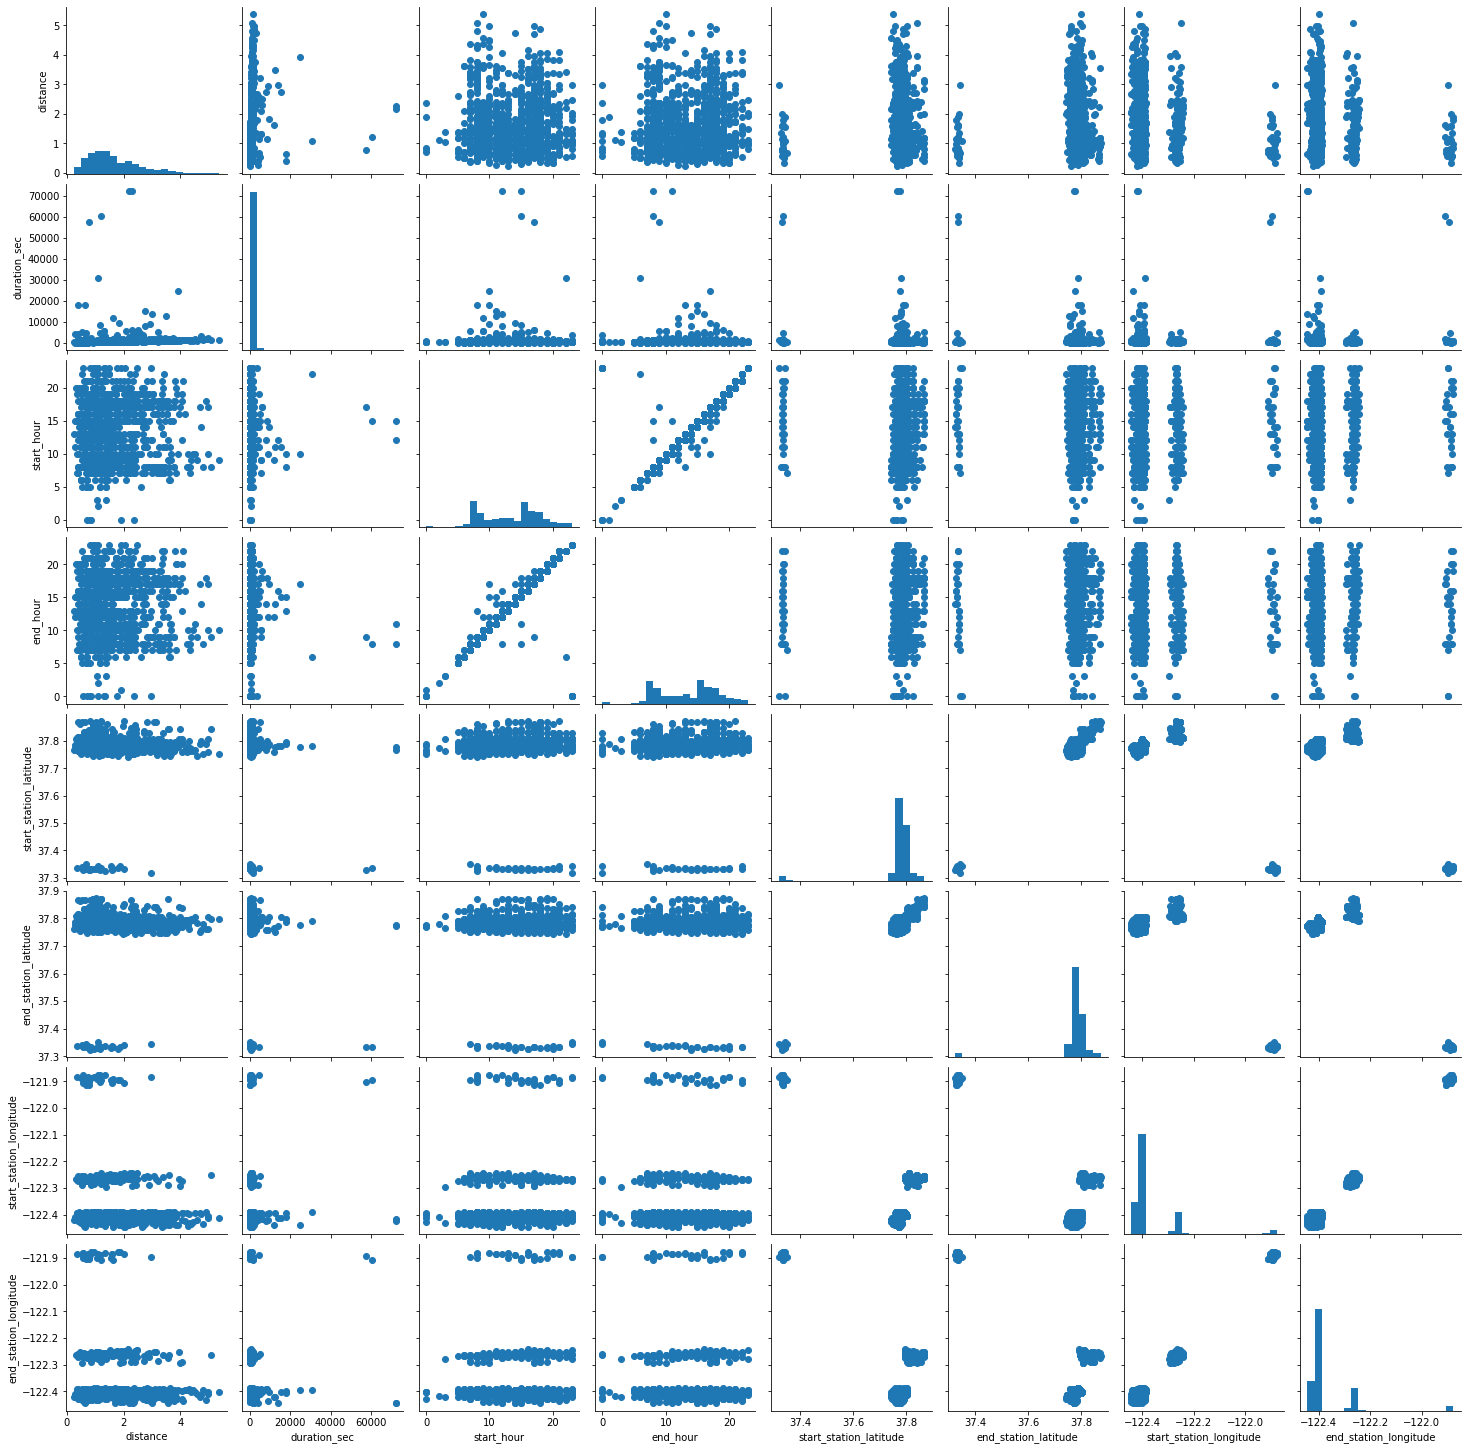

In [24]:
numeric_vars = ['distance', 
                'duration_sec', 
                'start_hour', 'end_hour', 
                'start_station_latitude', 'end_station_latitude',
                'start_station_longitude', 'end_station_longitude'
               ]
sample = df_distance.sample(n = 1000)
g = sb.PairGrid(data = sample, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

### Trip Duration vs User Types

Recall that we split the trips into: short trips and long trips, where short trip is the one less than 1 hour. We can two types of users: Supscribers and Customers. Let us see if there is a difference trend in the trips according to the user type.

As we see from the figure below, for short trips Subscripers on average have shorter trips than Customers. On the other hand, for long trips both Subscripers and Customers have almost the same mean and median, but the number of Customers for are much larger than Subscripers.

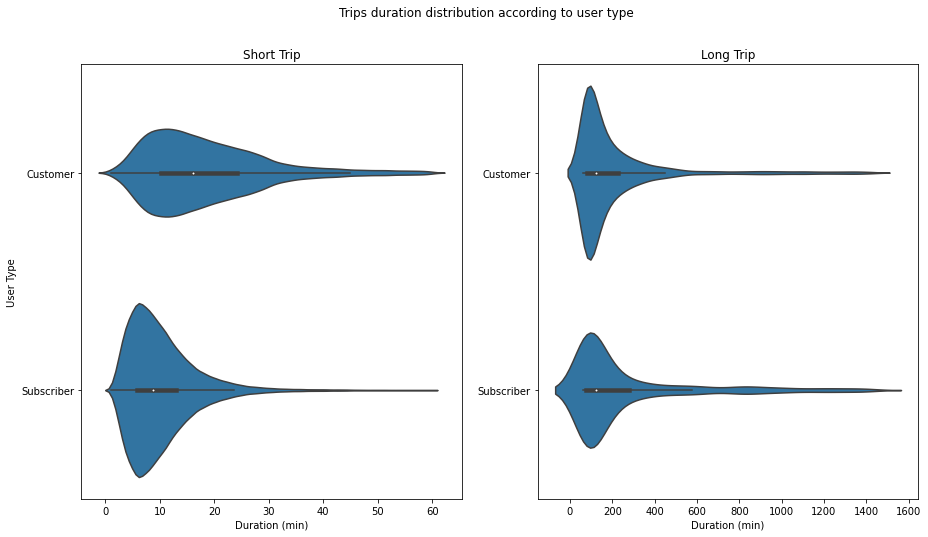

In [25]:
plt.figure(figsize = [15, 8])
plt.suptitle('Trips duration distribution according to user type')

plt.subplot(1, 2, 1) 
sb.violinplot(data = df[df['short_trip']], y = 'user_type', x = 'duration_min', color = sb.color_palette()[0])
plt.xlabel("Duration (min)")
plt.ylabel("User Type")
plt.title("Short Trip")

plt.subplot(1, 2, 2) 
sb.violinplot(data = df[df['short_trip'] == False], y = 'user_type', x = 'duration_min', color = sb.color_palette()[0])
plt.xlabel("Duration (min)")
plt.ylabel("")
plt.title("Long Trip")
plt.show()

### Trip Duration vs Day of the week

As we see earlier, Bay Wheel users usually uses bikes for daily going to work and more in weekdays than weekends. Let us see the relationship between the day of the week and the trip duration.

For short trips (majority of the data ~ 97%), users have longer trips during weekends than weekdays, while for long trips there is no big distinguishing between the different days of the week.

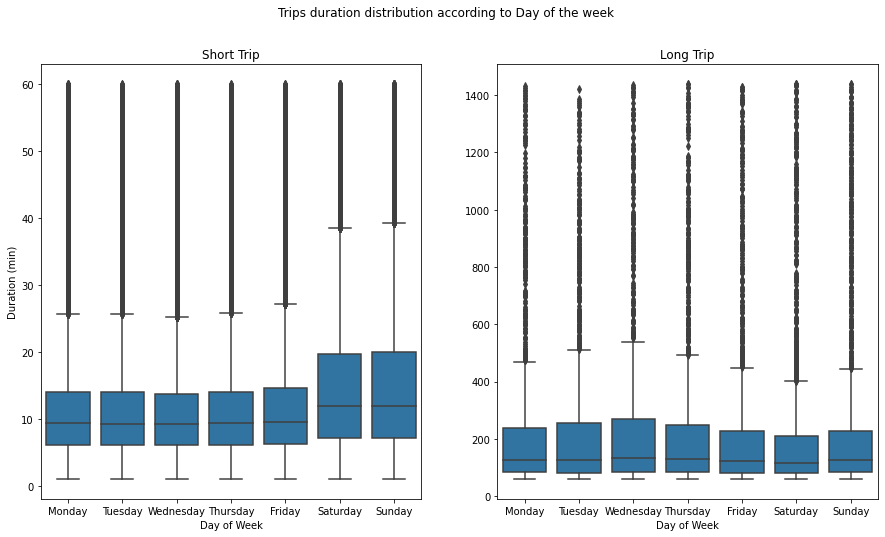

In [26]:
plt.figure(figsize = [15, 8])
plt.suptitle('Trips duration distribution according to Day of the week')

plt.subplot(1, 2, 1) 
sb.boxplot(data = df[df['short_trip']], x = 'day_of_week', y = 'duration_min', color = sb.color_palette()[0])
plt.xticks(np.arange(0,7,1), days);
plt.xlabel("Day of Week")
plt.ylabel("Duration (min)")
plt.title('Short Trip');

plt.subplot(1, 2, 2) 
sb.boxplot(data = df[df['short_trip'] == False], x = 'day_of_week', y = 'duration_min', color = sb.color_palette()[0])
plt.xticks(np.arange(0,7,1), days);
plt.xlabel("Day of Week")
plt.ylabel("")
plt.title('Long Trip');

plt.show()

### Trip Duration vs Distance
It is intutive that duration is proportational with distance. However, it will be challenging to get this relation from this dataset for two reasons:
- The actual distance can't be determined by the start/end points because that will be the shortest line path (euclidien distance). 
- The duration may not be accurate because the user may have stops within the trip.

So let us see what we can get from plotting the correlation between the euclidien distance between start and end positions and the duration of the trip.

Plotting the scatter plot shows there is weak relationship between the duration and distance, for me this is not expected behavior which reflect the strong effect of the two points mentioned above on the accuracy of relationships especially the second point.

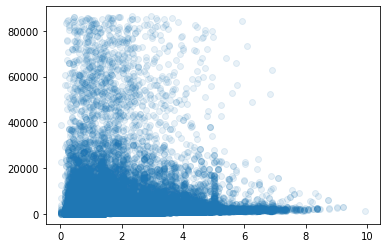

In [27]:
plt.scatter(data = df_distance, x = 'distance', y = 'duration_sec', alpha = 1/10);

## Multivariate Exploration



### Station Geographic vs Bick Pickup & Drop-off

The geographical locations determined by two variables: Latitude & Longitude. Ploting a 2 diemsion plot between them shows the geographic distribution of stations. So let us plot the relationship between stations used to pick-up the bick and the ons used for the drop-off. 

A heatmap is perfect for this case, but we will need to group stations into bins according to its geographic locations. As we have three clusters of stations, we will handle each separately.
As we see in the next figure the heatmaps for the Pick Up and Drop Off looks similar, so we need to explore this by calculating the differences between Pick Up and Drop Off per each station. This will be as if we substract the two heatmaps from each other.

First, will group all `start` trips by the station, then subtract from that the `end` trips for the same station. A scatter plot with diverging paletter is shown to help us to understand the bikes flow at a given day. Here I selected a day in October which is a peak case for the dataset. As we see, most of the stations has a balance (between +/- 10 bikes), and very few stations have less than 20 bikes shortage at that day.

Plotting the same figure for all the data almost have the same distribution.

In [28]:
df_stations = df.loc[:,('start_station_longitude','start_station_latitude')]
df_stations.drop_duplicates(inplace=True)

# Set a box arround all the stations
long_margin = 0.1
lat_margin = 0.1
bay_box = (  df_stations.start_station_longitude.min()-long_margin,
             df_stations.start_station_longitude.max()+long_margin,
             df_stations.start_station_latitude.min()-lat_margin, 
             df_stations.start_station_latitude.max()+lat_margin
           )
# Set a boundy box for the three cities
san_box = (-122.46, -122.37, 37.73, 37.82)
oak_box = (-122.31, -122.20, 37.76, 37.89)
jose_box = (-121.915,-121.87, 37.315, 37.355)

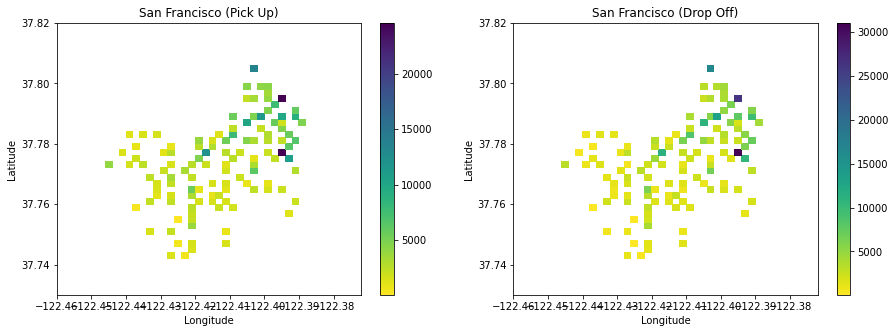

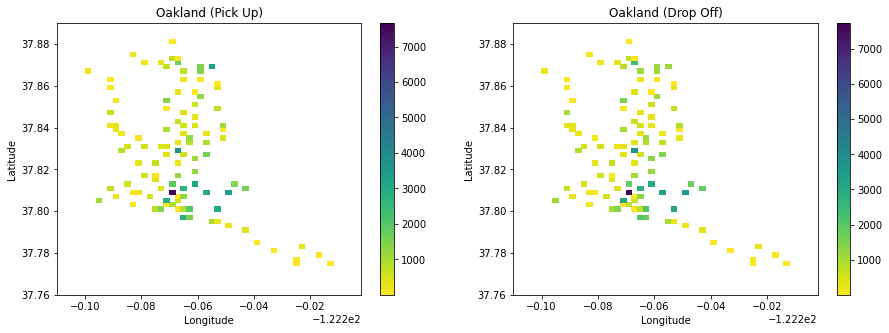

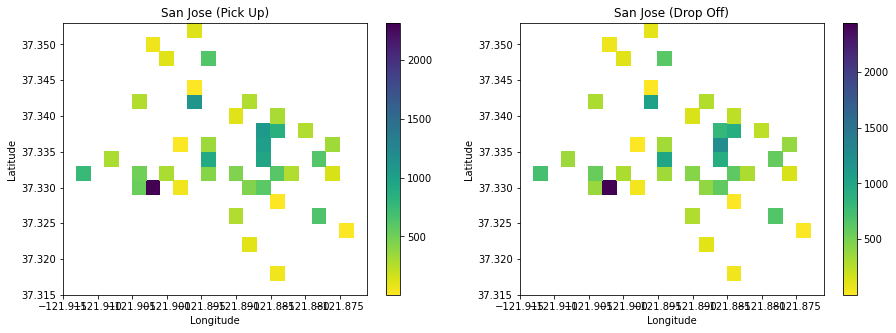

In [29]:
def plot_action(title, box, action, i):
    plt.subplot(1, 2, i)
    bins_x = np.arange(box[0], box[1], 0.002)
    bins_y = np.arange(box[2], box[3], 0.002)
    plt.hist2d(data = df, x = action + '_station_longitude', y = action + '_station_latitude',
               bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
    plt.ylabel("Latitude")
    plt.xlabel("Longitude")
    plt.title(title)
    plt.colorbar();

plt.figure(figsize = [15, 5])
plot_action("San Francisco (Pick Up)", san_box, 'start', 1)
plot_action("San Francisco (Drop Off)", san_box, 'end', 2)

plt.figure(figsize = [15, 5])
plot_action("Oakland (Pick Up)", oak_box, 'start', 1)
plot_action("Oakland (Drop Off)", oak_box, 'end', 2)

plt.figure(figsize = [15, 5])
plot_action("San Jose (Pick Up)", jose_box, 'start', 1)
plot_action("San Jose (Drop Off)", jose_box, 'end', 2)

plt.show()

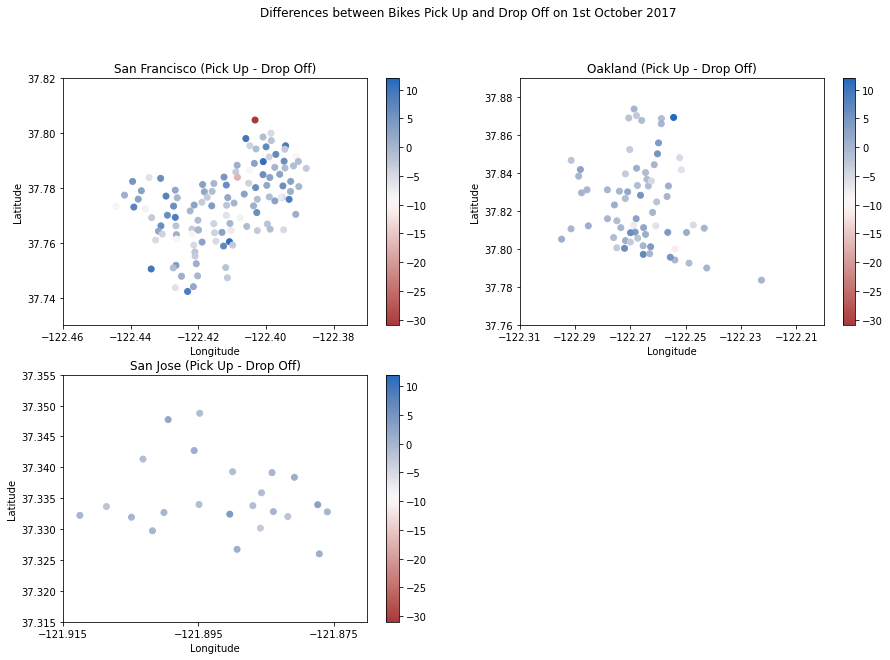

In [30]:
def plot_diff(df_diff, title, box, i):
    plt.subplot(2, 2, i)
    plt.scatter(data = df_diff, x = 'start_station_longitude', y = 'start_station_latitude', c = 'diff',
                cmap = 'vlag_r')
    plt.xlim(box[0], box[1])
    plt.ylim(box[2], box[3])
    x_ticks = np.arange(box[0], box[1], 0.02)
    plt.ylabel("Latitude")
    plt.xlabel("Longitude")
    plt.xticks(x_ticks)
    plt.title(title)
    plt.colorbar()
    
def plot_bike_traffic(traffic_df):
    pick_up = pd.DataFrame(traffic_df.groupby(['start_station_id', 'start_station_longitude', 'start_station_latitude']).size(), columns = ['pick'])
    pick_up.reset_index(inplace=True)
    drop_off = pd.DataFrame(traffic_df.groupby(['end_station_id', 'end_station_longitude', 'end_station_latitude']).size(), columns = ['drop'])
    drop_off.reset_index(inplace=True)

    df_diff = pd.merge(pick_up, drop_off, 
                        left_on = ['start_station_id', 'start_station_longitude', 'start_station_latitude'], 
                        right_on = ['end_station_id', 'end_station_longitude', 'end_station_latitude'],
                        how = 'right')
    df_diff['diff'] = df_diff['pick'] - df_diff['drop']
  
    plt.figure(figsize = [15, 10])
    plot_diff(df_diff, "San Francisco (Pick Up - Drop Off)", san_box, 1)
    plot_diff(df_diff, "Oakland (Pick Up - Drop Off)", oak_box, 2)
    plot_diff(df_diff, "San Jose (Pick Up - Drop Off)", jose_box, 3)

first_october_df = df[(df['start_time'] > '2017-10-01 00:00:00') & (df['start_time'] < '2017-10-01 23:59:59')]
plot_bike_traffic(first_october_df)
plt.suptitle("Differences between Bikes Pick Up and Drop Off on 1st October 2017");

plt.show()

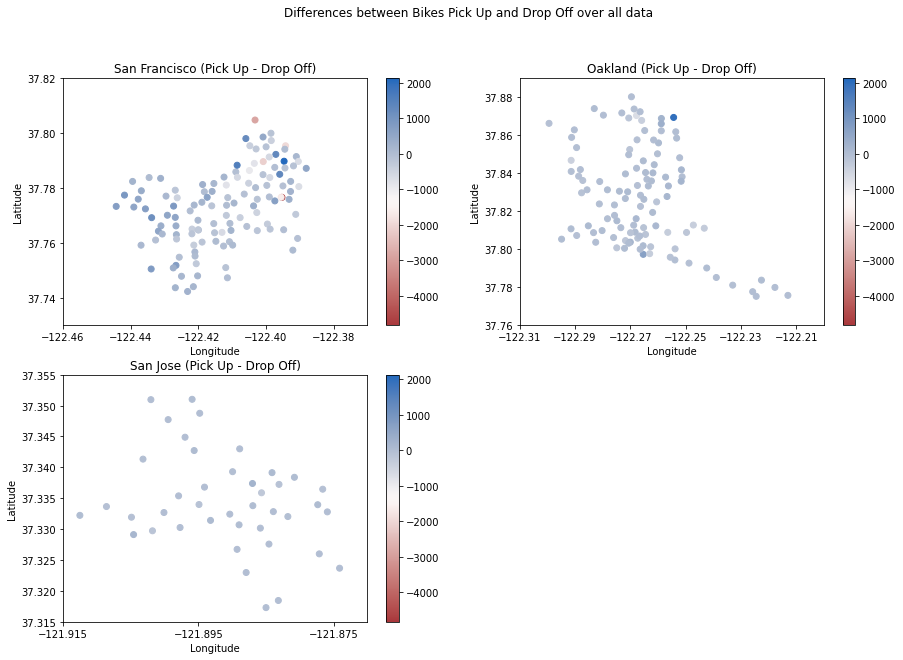

In [31]:
plot_bike_traffic(df)
plt.suptitle("Differences between Bikes Pick Up and Drop Off over all data");
plt.show()

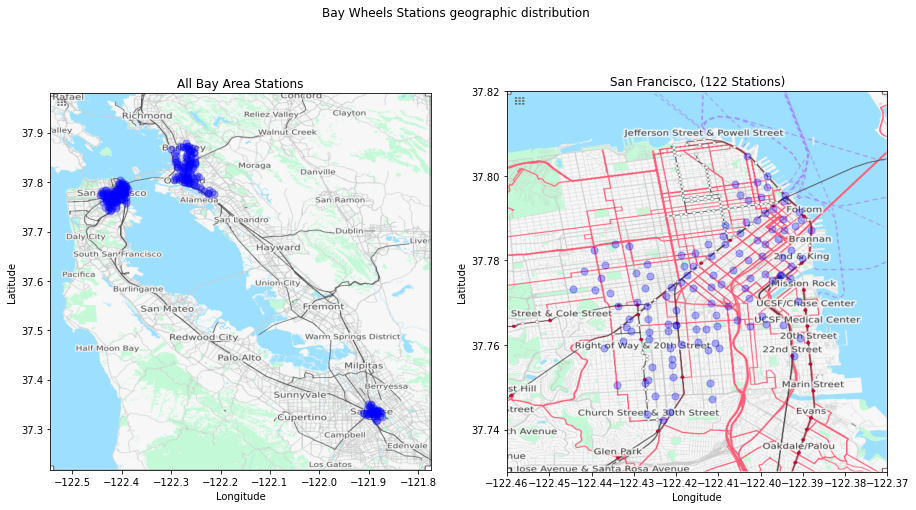

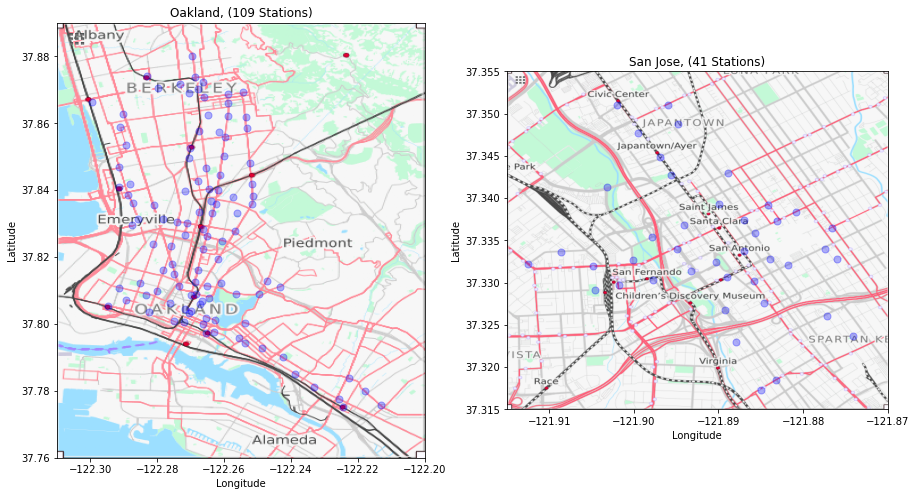

In [32]:
# Plot given geo data on the given image
def plot_map(box, img, title, i):
    ruh_m = plt.imread(img)
    ax = plt.subplot(1, 2, i)
    ax.scatter(df_stations.start_station_longitude, df_stations.start_station_latitude, zorder=1,
               alpha= 0.3, c='b', s=50)
    ax.set_title(title)
    ax.set_xlim(box[0],box[1])
    ax.set_ylim(box[2],box[3])
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.imshow(ruh_m, zorder=0, extent = box)

# Filter given data on the box boundry
def filter_location(all_df, box, action):
    filtered = all_df[(all_df[action + "_station_longitude"] > box[0]) & 
                  (all_df[action + "_station_longitude"] < box[1]) &
                  (all_df[action + "_station_latitude"] > box[2]) & 
                  (all_df[action + "_station_latitude"] < box[3])
                 ]
    return filtered

# Filter stations per each city
san_stations_start = filter_location(df_stations, san_box, "start")
oak_stations_start = filter_location(df_stations, oak_box, "start")
jose_stations_start = filter_location(df_stations, jose_box, "start")

# Plot
plt.figure(figsize = [15, 8])
plt.suptitle('Bay Wheels Stations geographic distribution')

plt.ylim()
plot_map(bay_box, 'res/bay.png', 'All Bay Area Stations', 1)
plot_map(san_box, 'res/san.png', 'San Francisco, ({:2d} Stations)'.format(san_stations_start.shape[0]), 2)
plt.show()

plt.figure(figsize = [15, 8])
plot_map(oak_box, 'res/oak.png', 'Oakland, ({:2d} Stations)'.format(oak_stations_start.shape[0]), 1)
plot_map(jose_box, 'res/jose.png', 'San Jose, ({:2d} Stations)'.format(jose_stations_start.shape[0]), 2)
plt.show()

### Distinct Bikes vs Station

As each bike has a different identifier, we can show the relationship between station location and how many distinct bikes passed by this station.

We see that most of stations processed arround 500-1000 bikes, while locations with high number of bikes (more than 3000) tends to be at the borders of the city.

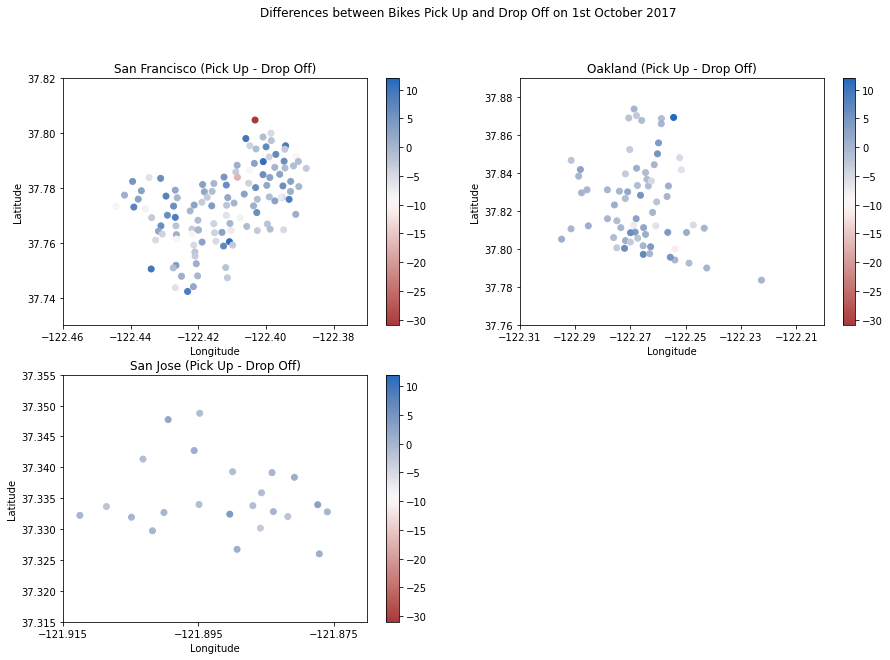

In [33]:
def plot_diff(df_diff, title, box, i):
    plt.subplot(2, 2, i)
    plt.scatter(data = df_diff, x = 'start_station_longitude', y = 'start_station_latitude', c = 'diff',
                cmap = 'vlag_r')
    plt.xlim(box[0], box[1])
    plt.ylim(box[2], box[3])
    x_ticks = np.arange(box[0], box[1], 0.02)
    plt.ylabel("Latitude")
    plt.xlabel("Longitude")
    plt.xticks(x_ticks)
    plt.title(title)
    plt.colorbar()
    
def plot_bike_traffic(traffic_df):
    pick_up = pd.DataFrame(traffic_df.groupby(['start_station_id', 'start_station_longitude', 'start_station_latitude']).size(), columns = ['pick'])
    pick_up.reset_index(inplace=True)
    drop_off = pd.DataFrame(traffic_df.groupby(['end_station_id', 'end_station_longitude', 'end_station_latitude']).size(), columns = ['drop'])
    drop_off.reset_index(inplace=True)

    df_diff = pd.merge(pick_up, drop_off, 
                        left_on = ['start_station_id', 'start_station_longitude', 'start_station_latitude'], 
                        right_on = ['end_station_id', 'end_station_longitude', 'end_station_latitude'],
                        how = 'right')
    df_diff['diff'] = df_diff['pick'] - df_diff['drop']
  
    plt.figure(figsize = [15, 10])
    plot_diff(df_diff, "San Francisco (Pick Up - Drop Off)", san_box, 1)
    plot_diff(df_diff, "Oakland (Pick Up - Drop Off)", oak_box, 2)
    plot_diff(df_diff, "San Jose (Pick Up - Drop Off)", jose_box, 3)

first_october_df = df[(df['start_time'] > '2017-10-01 00:00:00') & (df['start_time'] < '2017-10-01 23:59:59')]
plot_bike_traffic(first_october_df)
plt.suptitle("Differences between Bikes Pick Up and Drop Off on 1st October 2017");

plt.show()

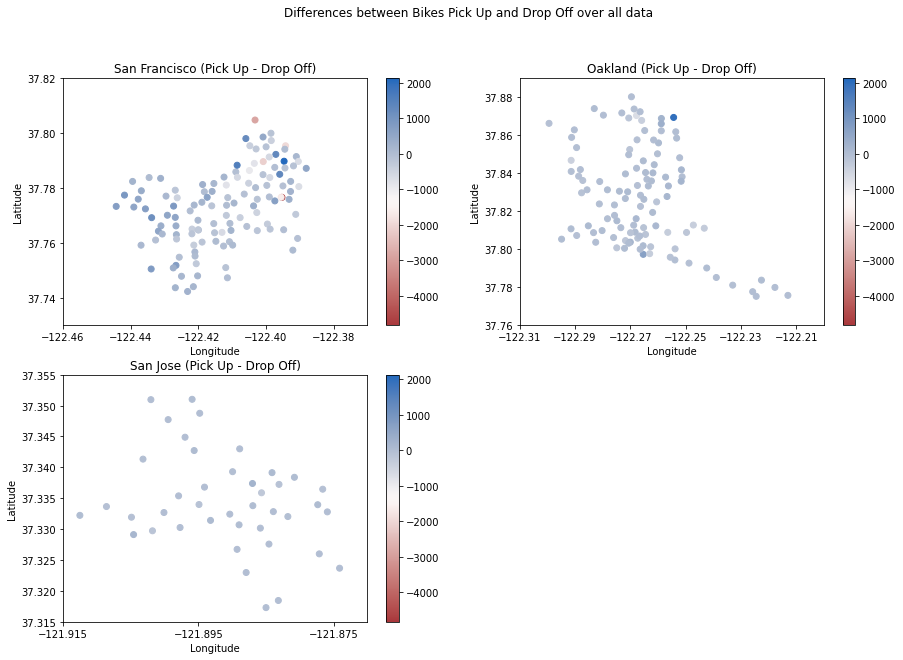

In [34]:
plot_bike_traffic(df)
plt.suptitle("Differences between Bikes Pick Up and Drop Off over all data");
plt.show()

### Some of the relationships observed during the investigation

The study of Bar Wheels data reveals the following facts about the trips characterstics
- Most of bikes users at Bay Wheels uses it for short trips to go to work / or get back. This kind of trips is short and usually between 8 to 10 minutes. The peak hours for using bikes is at 8 AM and 5 PM (the start and end time for business days)
- Users tends to use bikes during weekends for long trips, and the weekends trips are 40% less than weekdays.
- Non members (21% of total users) uses bikes for longer trips than Bay Wheel members (Subscribers).
- There is a balance between the bikes pick-up and drop-off, and stations should have at most 10 spare bikes to fullfill user needs. 
- Few stations has higher drop-off than pick-up that reaches 30 bikes per day. Locating those stations on map shows that it is stations on the city border may be users takes another transportation means after dropping off the bike.
- Euclidean distance between pick-up and drop-off bick is less than 10KM for over 99% of data.
- Stations distributed over three clusters (cities): San Francisco, Oakland and San Jose area.
- Stations usually process 500-1000 different bikes. Stations at the city borders encounter larger number of bikes that can reach 3500 different bike.

### Remarks

At the beginning of this study, I was under the impression that bikes used more for fun rather than a mean of transportation used for the daily routine. So it was surprising to find the trips count during weekends is far less than weekend.

Another interesting issue was the low positive correlation (0.1) between the trip duration and the trip distance, so more attributes need to be added to this dataset to have proper relationship between duration and trip.


## References
- Lyft https://www.lyft.com/bikes/bay-wheels/system-data
- Wikipedia https://en.wikipedia.org/wiki/Bay_Wheels
- Estimate the distance between two points (latitude, longitude) https://stackoverflow.com/questions/15736995/how-can-i-quickly-estimate-the-distance-between-two-latitude-longitude-points
- Open Street Maps  https://www.openstreetmap.org/
- Plotting Geigraohic Data https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

In [35]:
#~/.local/bin/jupyter-nbconvert "blog.ipynb" 